Predicting the quality of wine given other attributes.

In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Loading in the data
data = pd.read_csv("winequality(1).csv")
print(data.head())

   Fixed acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   Alcohol  Quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
# Standardizing all variables other than Quality. (using StandardScalar)
features = data.drop('Quality', axis=1)
target = data['Quality']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Partitioning the dataset (using random_state = 2024, Partitions 60/20/20, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=2024, stratify=target)
X_train_a, X_train_b, y_train_a, y_train_b = train_test_split(X_train, y_train, test_size=0.25, random_state=2024, stratify=y_train)

In [ ]:
train_a_accuracy = []
train_b_accuracy = []
# Iterating on K ranging from 1 to 30
k_range = range(1, 31)
# Building a KNN classification model to predict Quality based on all the remaining numeric variables.
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_a, y_train_a)
    train_a_pred = knn.predict(X_train_a)
    train_b_pred = knn.predict(X_train_b)
    train_a_accuracy.append(accuracy_score(y_train_a, train_a_pred))
    train_b_accuracy.append(accuracy_score(y_train_b, train_b_pred))

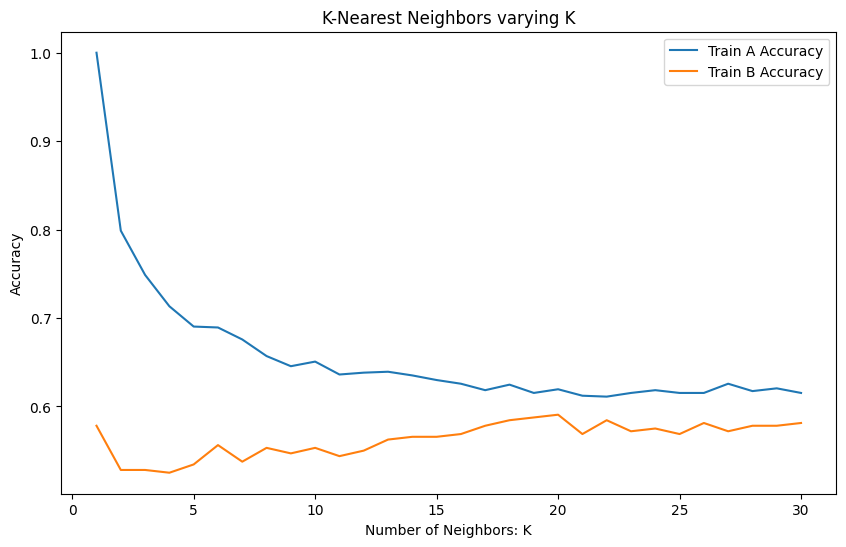

In [ ]:
# Plotting the accuracy for Train A and Train B datasets
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_a_accuracy, label='Train A Accuracy')
plt.plot(k_range, train_b_accuracy, label='Train B Accuracy')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors varying K')
plt.legend()
plt.show()

In [ ]:
# Printing the value K which produced the best accuracy in the train A and train B data sets
best_k_train_a = train_a_accuracy.index(max(train_a_accuracy)) + 1
best_k_train_b = train_b_accuracy.index(max(train_b_accuracy)) + 1
print(f'Best k for Train A Data: {best_k_train_a}')
print(f'Best k for Train B Data: {best_k_train_b}')

Best k for Train A Data: 1
Best k for Train B Data: 20


Confusion Matrix:
[[ 0  0  2  0  0  0]
 [ 0  0  6  5  0  0]
 [ 0  0 88 45  3  0]
 [ 0  0 38 74 16  0]
 [ 0  0  4 25 11  0]
 [ 0  0  0  1  2  0]]


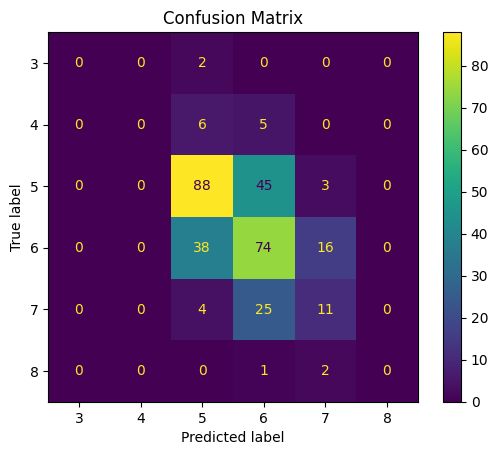

In [ ]:
# Generating predictions for the test partition with the chosen value of k. (best_k_val=20)
knn_best = KNeighborsClassifier(n_neighbors=best_k_train_b)
knn_best.fit(X_train_a, y_train_a)
test_pred = knn_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, test_pred)

# Printing and plotting the confusion matrix of the actual vs predicted wine quality.
print("Confusion Matrix:")
print(conf_matrix)
ConfusionMatrixDisplay.from_estimator(knn_best, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Printing the test dataframe with predicted quality
test_df = pd.DataFrame(X_test, columns=features.columns)
test_df['Quality'] = y_test
test_df['Predicted Quality'] = test_pred
print(test_df)

     Fixed acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0        -0.413454         -0.658202    -0.159061       -0.524166  -0.158692   
1        -0.700719          1.939510    -1.134720        2.242798  -0.116184   
2         2.803917         -0.378878     1.278752       -0.240375  -0.349975   
3         0.965420         -0.490607     1.124700        0.114364  -0.222453   
4         0.333436          1.241200    -0.672566       -0.027532  -0.031169   
..             ...               ...          ...             ...        ...   
315       0.161077         -0.323013    -0.005010       -0.169427  -0.690035   
316       1.022873         -1.216849     0.405794       -0.666062  -0.264960   
317       1.827215         -1.943091     1.227401        1.036685   0.351398   
318       0.390889          0.906012    -1.391472       -0.098479   0.011338   
319       1.884668         -0.323013     0.867948       -0.666062   1.265308   

     Free Sulfur Dioxide  Total Sulfur 

In [ ]:
# Printing the accuracy of model on the test dataset
test_accuracy = accuracy_score(y_test, test_pred)
print(f'Accuracy on Test Data: {test_accuracy}')

Accuracy on Test Data: 0.540625
